In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

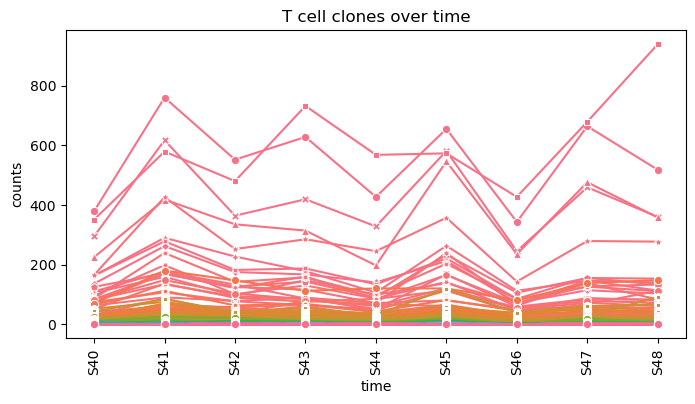

In [15]:
# Load the Excel file
sheet_index = 30
file_path = 'TCR_sequencing_all_samples_adjusted_20240508.xlsx'
tcr_df = pd.read_excel(file_path, sheet_name=sheet_index, engine='openpyxl')

# Remove rows where 'CDR3.amino.acid.sequence' is NaN
tcr_df = tcr_df.dropna(subset=['CDR3.amino.acid.sequence'])

# Select columns containing '_S'
tcr_counts = tcr_df.filter(regex='_S4').copy()

# Rename columns by extracting the part after '_'
tcr_counts.columns = [col.split('_')[1] for col in tcr_counts.columns]

# Add an ID column
tcr_counts['id'] = ['TCR' + str(i + 1) for i in range(len(tcr_counts))]

# Melt the dataframe for plotting
tcr_counts_m = tcr_counts.melt(id_vars='id', var_name='time', value_name='counts').copy()

# Set factor levels for 'variable'
tcr_counts_m['time'] = pd.Categorical(tcr_counts_m['time'], categories=[f'S{i}' for i in range(1, 51)], ordered=True)

# Plot 1: Stacked Bar Plot
#plt.figure(figsize=(10, 6))
#sns.barplot(data=tcr_counts_m, x='variable', y='value', hue='id')
#plt.xticks(rotation=90)
#plt.title('Stacked Bar Plot')
#plt.legend().remove()
#plt.show()

# Plot 2: Filled Bar Plot
#plt.figure(figsize=(10, 6))
#sns.histplot(data=tcr_counts_m, x='variable', weights='value', hue='id', multiple='fill', edgecolor='grey')
#plt.xticks(rotation=90)
#plt.title('Filled Bar Plot')
#plt.legend().remove()
#plt.show()

# Plot 3: Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=tcr_counts_m, x='time', y='counts', hue='id', style='id', markers=True, dashes=False)
plt.xticks(rotation=90)
plt.title('T cell clones over time')
plt.legend().remove()
plt.show()